In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Load data
from google.colab import drive

drive.mount('/content/drive')
directory= '/content/drive/MyDrive/survey lung cancer.csv'
df = pd.read_csv(directory)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
df.columns = ["GENDER", "AGE", "SMOKING", "YELLOW FINGERS", 
              "ANXIETY", "PEER PRESSURE", "CHRONIC DISEASE", 
              "FATIGUE", "ALLERGY", "WHEEZING", "ALCOHOL CONSUMING", 
              "COUGHING", "SHORTNESS OF BREATH", "SWALLOWING DIFFICULTY", 
              "CHEST PAIN", "LUNG CANCER"]

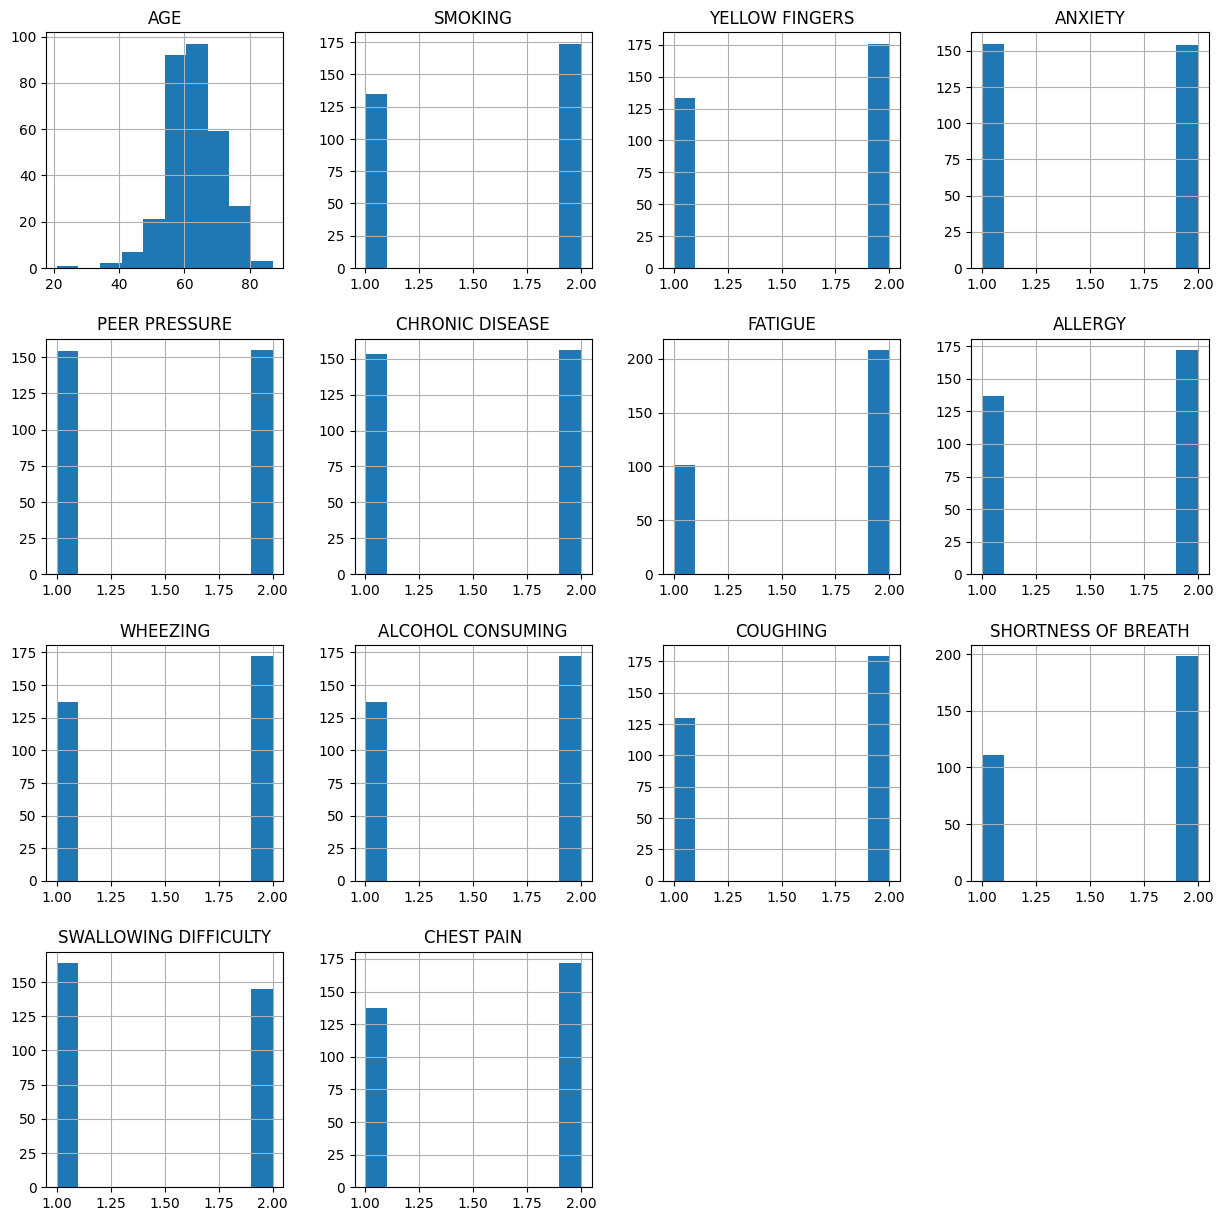

In [ ]:
import matplotlib.pyplot as plt
# plots other feature sets
df.hist(figsize = (15,15))
plt.show()

In [ ]:
# transforming dataset with dummies variables to replace characters with binary integers
df['GENDER'].replace(["M","F"], [0,1], inplace=True)
df['LUNG CANCER'].replace(["YES","NO"],[0,1], inplace=True)

In [ ]:
df.head()

,GENDER,AGE,SMOKING,YELLOW FINGERS,ANXIETY,PEER PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,0
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,0
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1


In [ ]:
#feature set
x = df[["GENDER", "AGE", "SMOKING", "YELLOW FINGERS", "ANXIETY", "PEER PRESSURE", "CHRONIC DISEASE","FATIGUE", "ALLERGY", "WHEEZING", "ALCOHOL CONSUMING", "COUGHING", "SHORTNESS OF BREATH", "SWALLOWING DIFFICULTY", "CHEST PAIN"]]

#label set
y = df["LUNG CANCER"]

In [ ]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (216, 15)
Number transactions y_train dataset:  (216,)
Number transactions x_test dataset:  (93, 15)
Number transactions y_test dataset:  (93,)


In [ ]:
# Train Model
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [ ]:
#Test Model
y_pred = model.predict(x_test)
print('Accuracy : ', accuracy_score(y_test, y_pred))

Accuracy :  0.956989247311828


In [ ]:
data = {'GENDER' : [0], 'AGE' : [25.0], 'SMOKING' : [2], 'YELLOW FINGERS' : [2], 'ANXIETY' : [1], 'PEER PRESSURE' : [1], 'CHRONIC DISEASE' : [1], 'FATIGUE' : [2], 'ALLERGY' : [1], 'WHEEZING' : [1], 'ALCOHOL CONSUMING' : [2], 'COUGHING' : [1], 'SHORTNESS OF BREATH' : [1], 'SWALLOWING DIFFICULTY' : [1], 'CHEST PAIN' : [1]}
data = pd.DataFrame(data)
prediction = model.predict(data)
if prediction[0] == 0:
  print("No Lung Cancer")
else:
  print("Lung Cancer")

No Lung Cancer
